In [1]:
# Using the "scCODA" conda environment
# https://sccoda.readthedocs.io/en/latest/getting_started.html
# pip install sccoda
# pip install tensorflow-probability
# pip install tensorflow
# pip install tf-keras

# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import arviz as az
import scanpy as sc

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd
import anndata as ad

In [2]:
# Load data

cell_counts = pd.read_csv("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/tati/out/kevin/Writeup4/Writeup4_7day-abeta_composition.csv")

print(cell_counts)

               SampleID  cluster_1  cluster_2  cluster_3  cluster_4  \
0  het_7d_abeta_br1_tr2       1660       1732        448        447   
1        het_ut_br1_tr1        958       1046        289        402   
2        het_ut_br1_tr2       1796       1650        394        319   
3   wt_7d_abeta_br2_tr1       1201        873        721        416   
4   wt_7d_abeta_br2_tr2       1396       1208        390        509   
5         wt_ut_br2_tr1        897        708        536        593   
6         wt_ut_br2_tr2       1499       1143        365        291   

   cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  cluster_10  
0        499         51        195        227         45         124  
1        231         39        100        157         42          58  
2        540         61        204        196         57         109  
3        290        677        382        313        254         152  
4        286        282        328        262        159         121  
5    

In [3]:
string = "het_7d_abeta_br1_tr2"
parts = string.split('_')[:-2]  # Keep all parts except the second-to-last and last
result = '_'.join(parts)
print(result)

het_7d_abeta


In [5]:
# Define a function to process each string
def process_string(string):
    parts = string.split('_')[:-2]  # Keep all parts except the second-to-last and last
    return '_'.join(parts)

# Apply the function to each string in the DataFrame
cell_counts['SampleID'] = cell_counts['SampleID'].apply(process_string)
cell_counts

,SampleID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,het_7d_abeta,1660,1732,448,447,499,51,195,227,45,124
1,het_ut,958,1046,289,402,231,39,100,157,42,58
2,het_ut,1796,1650,394,319,540,61,204,196,57,109
3,wt_7d_abeta,1201,873,721,416,290,677,382,313,254,152
4,wt_7d_abeta,1396,1208,390,509,286,282,328,262,159,121
5,wt_ut,897,708,536,593,227,569,342,225,188,88
6,wt_ut,1499,1143,365,291,235,368,287,268,179,104


In [6]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["SampleID"])

print(data_all)

AnnData object with n_obs × n_vars = 7 × 10
    obs: 'SampleID'


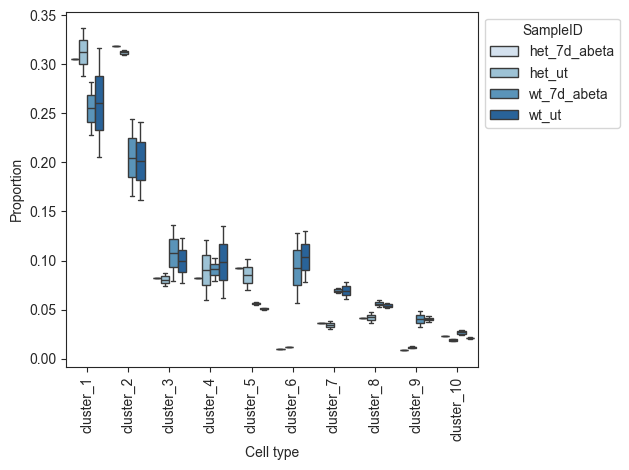

In [7]:
viz.boxplots(data_all, feature_name="SampleID")
plt.show()

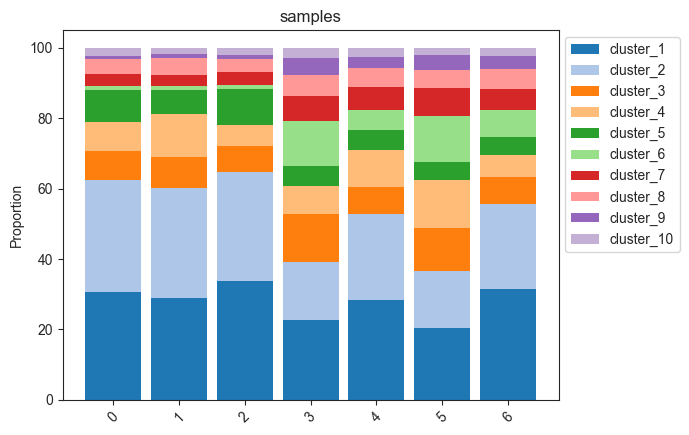

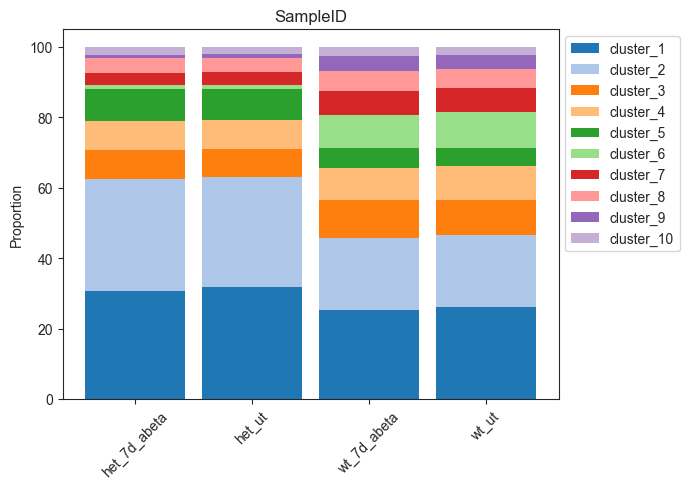

In [9]:
# Stacked barplot for each sample
viz.stacked_barplot(data_all, feature_name="samples")
plt.show()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_all, feature_name="SampleID")
plt.show()

In [8]:
# model all conditions at once
model_all = mod.CompositionalAnalysis(data_all, formula="SampleID", reference_cell_type="cluster_1")
all_results = model_all.sample_hmc()
all_results.summary()

I0000 00:00:1711841421.973620 44400630 service.cc:145] XLA service 0x2967a3280 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1711841421.973682 44400630 service.cc:153]   StreamExecutor device (0): Host, Default Version
  0%|          | 0/20000 [00:00<?, ?it/s]2024-03-30 16:30:22.026587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1711841422.345220 44400630 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 20000/20000 [00:33<00:00, 591.75it/s]


MCMC sampling finished. (42.980 sec)
Acceptance rate: 75.5%
Compositional Analysis summary:

Data: 7 samples, 10 cell types
Reference index: 0
Formula: SampleID

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
cluster_1             3.482      1361.753376
cluster_2             3.452      1321.507482
cluster_3             2.386       455.105107
cluster_4             2.351       439.451956
cluster_5             2.117       347.765498
cluster_6             1.115       127.680161
cluster_7             1.772       246.294604
cluster_8             1.766       244.821261
cluster_9             0.946       107.827033
cluster_10            1.056       120.364952


Effects:
                                    Final Parameter  Expected Sample  \
Covariate               Cell Type                                      
SampleID[T.het_ut]      cluster_1               0.0      1361.753376   
                        cluster_2               0.0      13

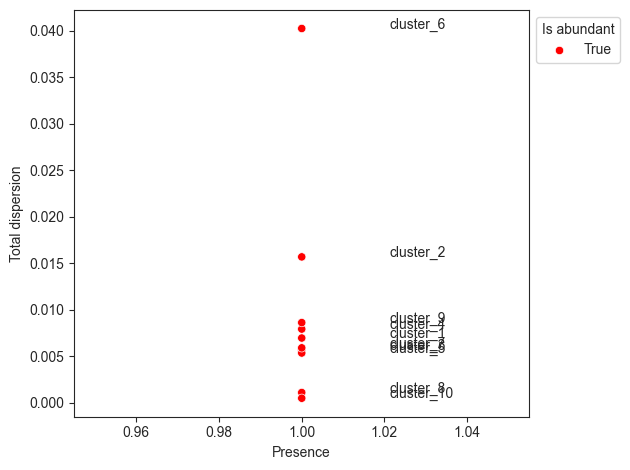

In [10]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [11]:
# Set wt_ut as "default" category

model_all = mod.CompositionalAnalysis(data_all, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type="cluster_6")
all_results = model_all.sample_hmc()
all_results.summary()

100%|██████████| 20000/20000 [00:33<00:00, 595.08it/s]


MCMC sampling finished. (42.642 sec)
Acceptance rate: 77.3%
Compositional Analysis summary:

Data: 7 samples, 10 cell types
Reference index: 5
Formula: C(SampleID, Treatment('wt_ut'))

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
cluster_1             3.018      1334.029355
cluster_2             2.841      1117.622826
cluster_3             2.001       482.489535
cluster_4             1.957       461.720270
cluster_5             1.627       331.941660
cluster_6             1.175       211.232460
cluster_7             1.492       290.022710
cluster_8             1.417       269.066680
cluster_9             0.779       142.160860
cluster_10            0.707       132.285072


Effects:
                                                            Final Parameter  \
Covariate                                       Cell Type                     
C(SampleID, Treatment('wt_ut'))[T.het_7d_abeta] cluster_1               0.0   
               

Comparing wildtype to Het (untreated)

In [20]:
# Select wt_ut and het_ut data
data_ut = data_all[data_all.obs["SampleID"].isin(["wt_ut", "het_ut"])]
print(data_ut.obs)

  SampleID
1   het_ut
2   het_ut
5    wt_ut
6    wt_ut


In [22]:
# Run scCODA with each cell type as the reference
cell_types = data_ut.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_ut, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: cluster_1


100%|██████████| 20000/20000 [00:33<00:00, 605.80it/s]


MCMC sampling finished. (41.965 sec)
Acceptance rate: 61.6%
Reference: cluster_2


100%|██████████| 20000/20000 [00:33<00:00, 590.86it/s]


MCMC sampling finished. (42.877 sec)
Acceptance rate: 49.3%
Reference: cluster_3


100%|██████████| 20000/20000 [00:33<00:00, 594.68it/s]


MCMC sampling finished. (42.616 sec)
Acceptance rate: 48.2%
Reference: cluster_4


100%|██████████| 20000/20000 [00:33<00:00, 593.49it/s]


MCMC sampling finished. (42.916 sec)
Acceptance rate: 56.2%
Reference: cluster_5


100%|██████████| 20000/20000 [00:34<00:00, 586.76it/s]


MCMC sampling finished. (43.106 sec)
Acceptance rate: 50.6%
Reference: cluster_6


100%|██████████| 20000/20000 [00:33<00:00, 598.75it/s]


MCMC sampling finished. (42.705 sec)
Acceptance rate: 47.9%
Reference: cluster_7


100%|██████████| 20000/20000 [00:34<00:00, 584.02it/s]


MCMC sampling finished. (43.378 sec)
Acceptance rate: 50.7%
Reference: cluster_8


100%|██████████| 20000/20000 [00:33<00:00, 591.08it/s]


MCMC sampling finished. (43.199 sec)
Acceptance rate: 45.5%
Reference: cluster_9


100%|██████████| 20000/20000 [00:33<00:00, 601.58it/s]


MCMC sampling finished. (42.045 sec)
Acceptance rate: 56.0%
Reference: cluster_10


100%|██████████| 20000/20000 [00:33<00:00, 596.01it/s]


MCMC sampling finished. (42.617 sec)
Acceptance rate: 57.5%


In [23]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

            times_credible  pct_credible  is_credible
cluster_1                0           0.0        False
cluster_2                0           0.0        False
cluster_3                0           0.0        False
cluster_4                0           0.0        False
cluster_5                0           0.0        False
cluster_6                9           0.9         True
cluster_7                0           0.0        False
cluster_8                0           0.0        False
cluster_9                0           0.0        False
cluster_10               0           0.0        False


Comparing wildtype untreated to wildtype 7day abeta

In [25]:
# Select wt_ut and het_ut data
data_ut = data_all[data_all.obs["SampleID"].isin(["wt_ut", "wt_7d_abeta"])]
print(data_ut.obs)

      SampleID
3  wt_7d_abeta
4  wt_7d_abeta
5        wt_ut
6        wt_ut


In [26]:
# Run scCODA with each cell type as the reference
cell_types = data_ut.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_ut, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: cluster_1


100%|██████████| 20000/20000 [00:32<00:00, 617.61it/s]


MCMC sampling finished. (41.013 sec)
Acceptance rate: 53.1%
Reference: cluster_2


100%|██████████| 20000/20000 [00:32<00:00, 611.17it/s]


MCMC sampling finished. (41.713 sec)
Acceptance rate: 57.9%
Reference: cluster_3


100%|██████████| 20000/20000 [00:33<00:00, 593.12it/s]


MCMC sampling finished. (42.703 sec)
Acceptance rate: 60.3%
Reference: cluster_4


100%|██████████| 20000/20000 [00:33<00:00, 598.30it/s]


MCMC sampling finished. (42.546 sec)
Acceptance rate: 45.7%
Reference: cluster_5


100%|██████████| 20000/20000 [00:34<00:00, 587.61it/s]


MCMC sampling finished. (43.345 sec)
Acceptance rate: 46.5%
Reference: cluster_6


100%|██████████| 20000/20000 [00:33<00:00, 597.04it/s]


MCMC sampling finished. (42.524 sec)
Acceptance rate: 49.7%
Reference: cluster_7


100%|██████████| 20000/20000 [00:33<00:00, 594.45it/s]


MCMC sampling finished. (42.623 sec)
Acceptance rate: 46.1%
Reference: cluster_8


100%|██████████| 20000/20000 [00:33<00:00, 591.17it/s]


MCMC sampling finished. (42.895 sec)
Acceptance rate: 42.2%
Reference: cluster_9


100%|██████████| 20000/20000 [00:34<00:00, 581.03it/s]


MCMC sampling finished. (43.886 sec)
Acceptance rate: 50.6%
Reference: cluster_10


100%|██████████| 20000/20000 [00:33<00:00, 589.02it/s]


MCMC sampling finished. (42.968 sec)
Acceptance rate: 49.9%


In [27]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

            times_credible  pct_credible  is_credible
cluster_1                0           0.0        False
cluster_2                0           0.0        False
cluster_3                0           0.0        False
cluster_4                0           0.0        False
cluster_5                0           0.0        False
cluster_6                0           0.0        False
cluster_7                0           0.0        False
cluster_8                0           0.0        False
cluster_9                0           0.0        False
cluster_10               0           0.0        False
